# 4) Reporte de visualización de datos:


Una vez obtenida la metadata extraída de la base de datos nos damos a la tarea de visualizar la muestra que tenemos para poder empezar a idear estrategias para implementar modelos de inteligencia artificial adecuados para las tareas específicas que queremos desarrollar.

Si bien ya realizamos algunas visualizaciones de datos en los reportes previos, esta sección está más enfocada al desarrollo de herramientas para visualizar los aspectos cuantitativos y cualitativos de los videos obtenidos en la base de datos de una forma individual.

Para cubrir todos los objetivos de la visualización del reporte para la elaboración del diagnóstico se realizaron una serie de herramientas para proyectar la distribución de la muestra con diferentes puntos de enfoque.

Nuevamente, el índice del proyecto va a reflejar las instancias del reporte que son la formulación de herramientas y hará la distinción de la descripción del reporte para el diagnóstico obtenido posterior a la síntesis de la gráfica.

Los siguientes bloques de código representan la creación de las herramientas que hacen posible la visualización del contenido, por lo que las descripciones en la parte superior de cada célula hacen referencia a la síntesis de la herramienta empleada, mientras que el texto en la parte inferior de la gráfica da una descripción estadística del resultado de la visualización del codigo. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from dateutil import parser
import isodate

In [ ]:
channels = pd.read_csv('channel_data_final.csv')

videos = pd.read_csv('video_data_final.csv')

comments = pd.read_csv('comments_data_final.csv')

### gráfica de barras de correlación entre el canal y la cantidad de suscriptores

La gráfica representada en la parte inferior al texto marca una métrica de proporción de los canales respecto al número de suscriptores a cada canal, es importante destacar la enorme distinción entre la muestra del estudio en cuanto al tamaño de los canales. Esta gráfica nos da una primera señal de que no contamos con una base de datos homogénea y que análisis posteriores tienen que tomar en cuenta que en cuanto a cantidad de suscriptores se refiere los primeros 5 canales cuentan con más del 50% de la cantidad de suscripciones totales de 66 canales. Y nos da nuestro primer marcador diagnóstico, que es que existe una verdadera necesidad por parte de los creadores de contenido de entender las diferentes dimensiones que pueden llegar a presentar canales con contenidos muy similares.

En segunda instancia es importante para el diagnóstico mencionar que el hecho de que existan creadores de contenido con tópicos muy similares que a su vez presentan una disparidad significativa en la cantidad de suscriptores es un marcador de impacto, La siguiente tarea a desarrollar al interpretar esta gráfica es encontrar una correlación entre los canales con alto número de suscriptores para encontrar los parámetros que tienen en común y tener nuestra primera evidencia de que es un creador de contenido exitoso en esta plataforma.

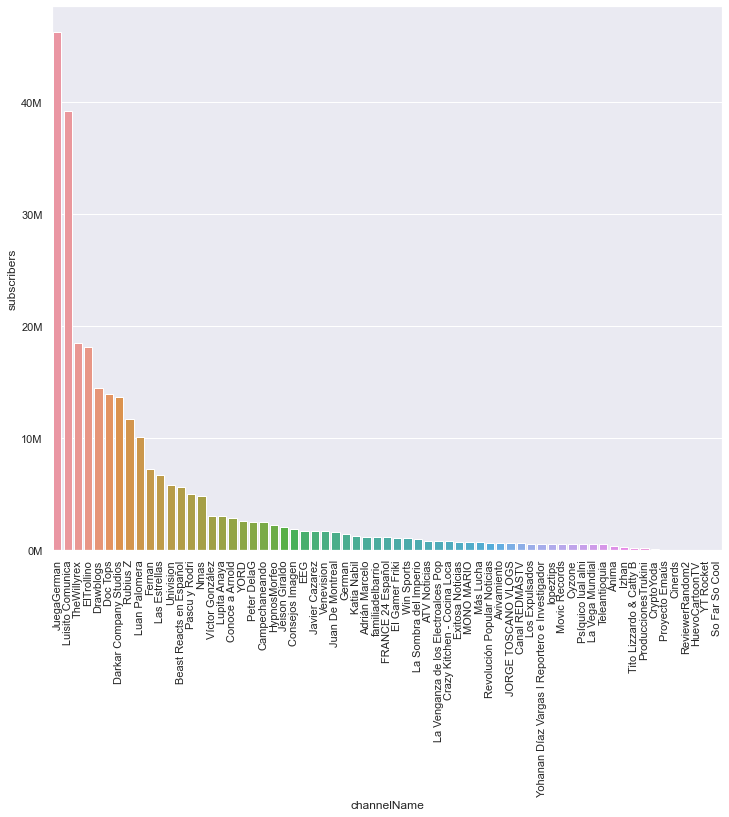

In [6]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x='channelName', y='subscribers', data=channels.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.savefig('Channel_stats_subs_final.pdf')

### gráfica de barras de correlación entre el canal y la cantidad de visualizaciones

esta es la representación visual de las proporciones de los canales por el número de visualizaciones , aunque son muy similares las 2 gráficas de barras se puede apreciar que el número de suscriptores no comparte una correlación directa con el número de vistas en todas las instancias de la muestra y nos deja nuestra siguiente clave de interpretación diagnóstica. Que el número de suscriptores no es determinante para tener un alto rendimiento en tiempo de reproducción.

Si bien existe una correlación directa entre el número de visualizaciones con el número de likes y comentarios. no es tal para el número de visualizaciones versus el número de suscriptores.

Se puede apreciar de una forma muy evidente que los canales que rompen con esta tendencia a la correlación directa son canales de contenido público exclusivo, como las productoras de televisión. 

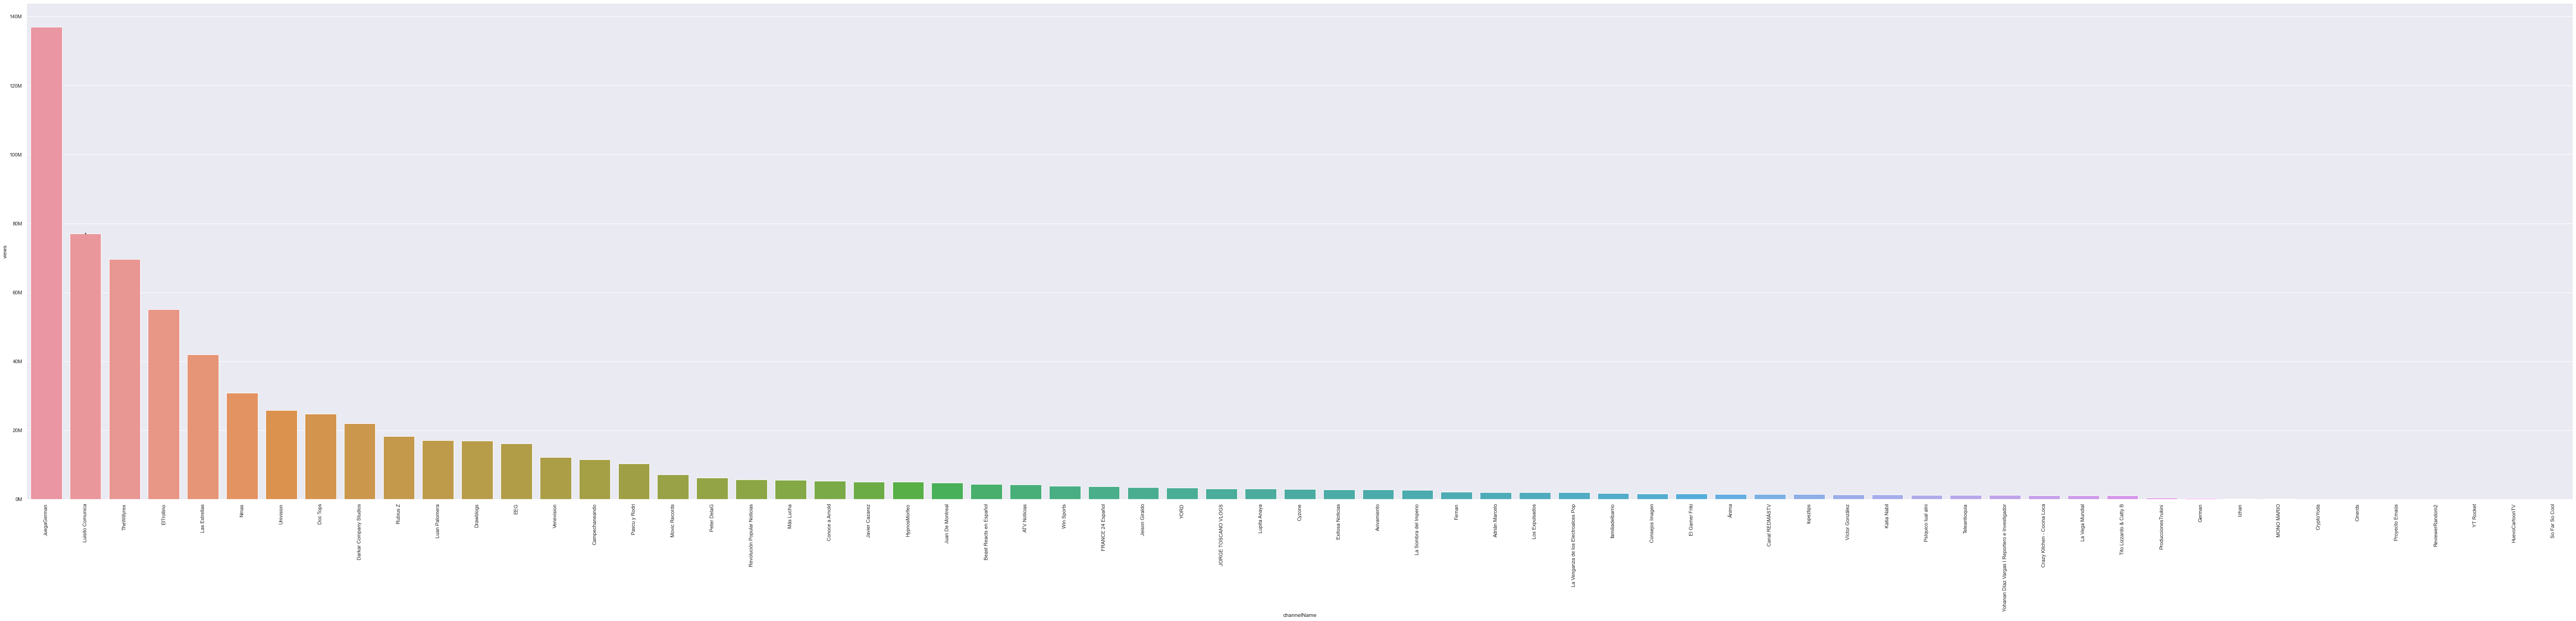

In [14]:
ax = sns.barplot(x='channelName', y='views', data=channels.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/100000000) + 'M'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
### Get video statistics for all the channels
#plt.savefig('channel_stats_views_final.pdf')

### Proyección de distribución de vistas por canal:


Desde resultado de la proyección de la gráfica de violín podemos encontrar mucha información valiosa para el desarrollo del proyecto, en primer lugar, la forma de cada una de las gráficas determina cual es el tipo de audiencia que recurre a cada uno de los canales muestra del estudio, una distribución a lo ancho del violín representa un público cautivo, es decir un número estable de visualizaciones por video, mientras que un violín con una distribución vertical representa canales que presentan videos que han sido virales y han captado a público externo a sus suscriptores y seguidores tradicionales.

Es importante mencionar también que dentro de todas las gráficas de violín hay 2 canales en particular que parecen tener una distribución enorme y aparenta no haber una correlación con la cantidad de suscriptores o de vistas a los canales.

La razón de esta anomalía es el tiempo en el que iniciamos a curar la base de datos,  si bien los 2 canales en cuestión son grandes, no son los que tienen una mayor cantidad de suscriptores ni de vistas, sin embargo han sido los canales que han publicado los videos con mas vistas de todos los de la muestra que tomamos.

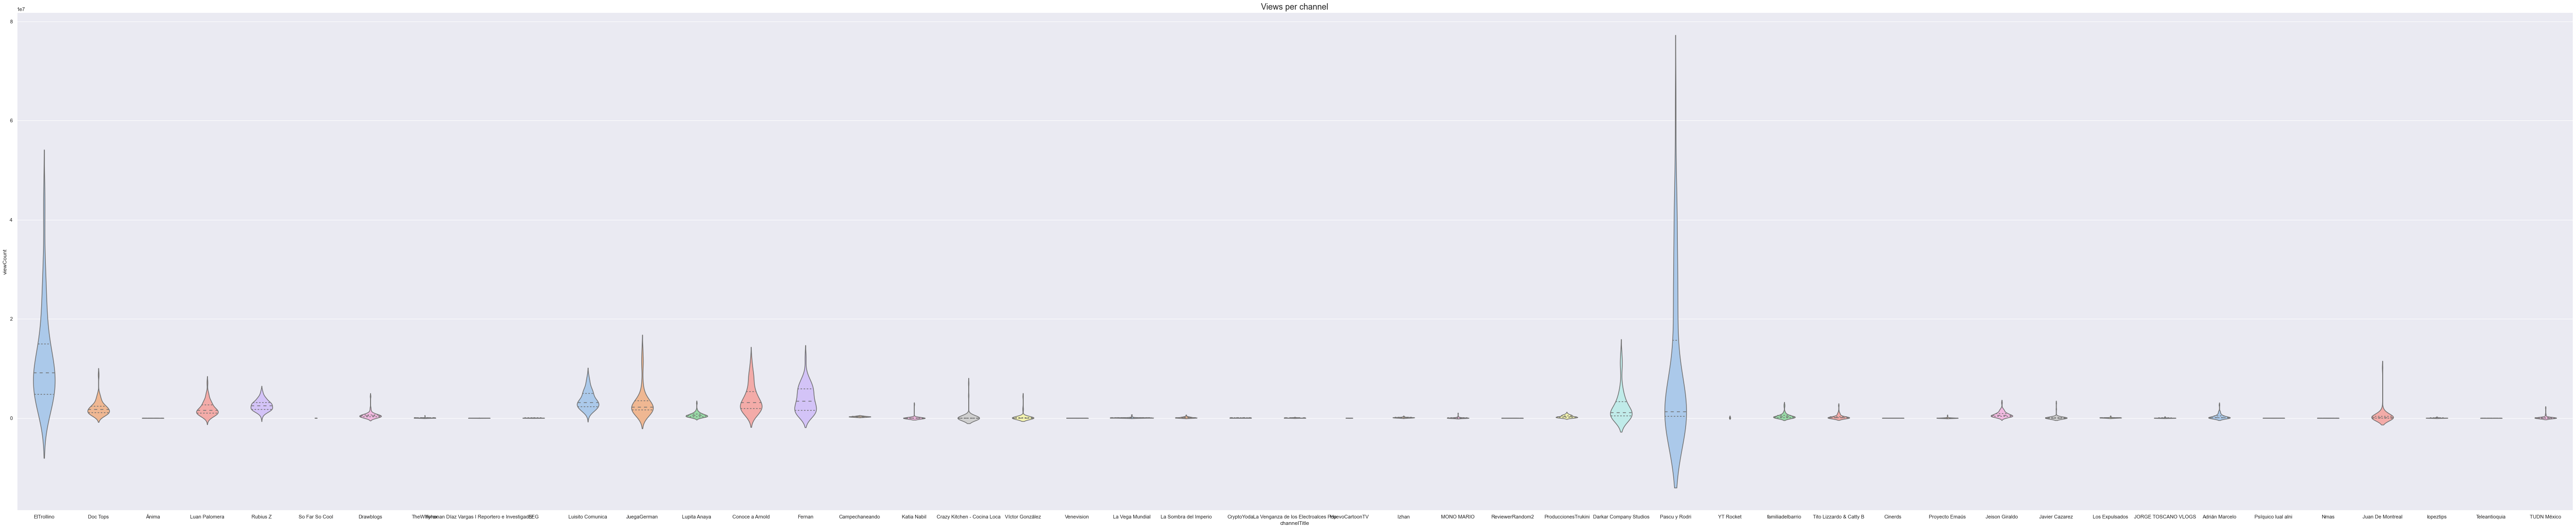

<Figure size 7200x1440 with 0 Axes>

In [7]:
# distribucion de vistas por canal:

plt.rcParams['figure.figsize'] = (100, 20)
sns.violinplot(x=videos['channelTitle'], y=videos['viewCount'],scale='count', inner='quartile',
               palette='pastel', split=True, fontsize=8)
plt.title('Views per channel', fontsize = 18)
plt.show()
#plt.savefig('viral_content.pdf')

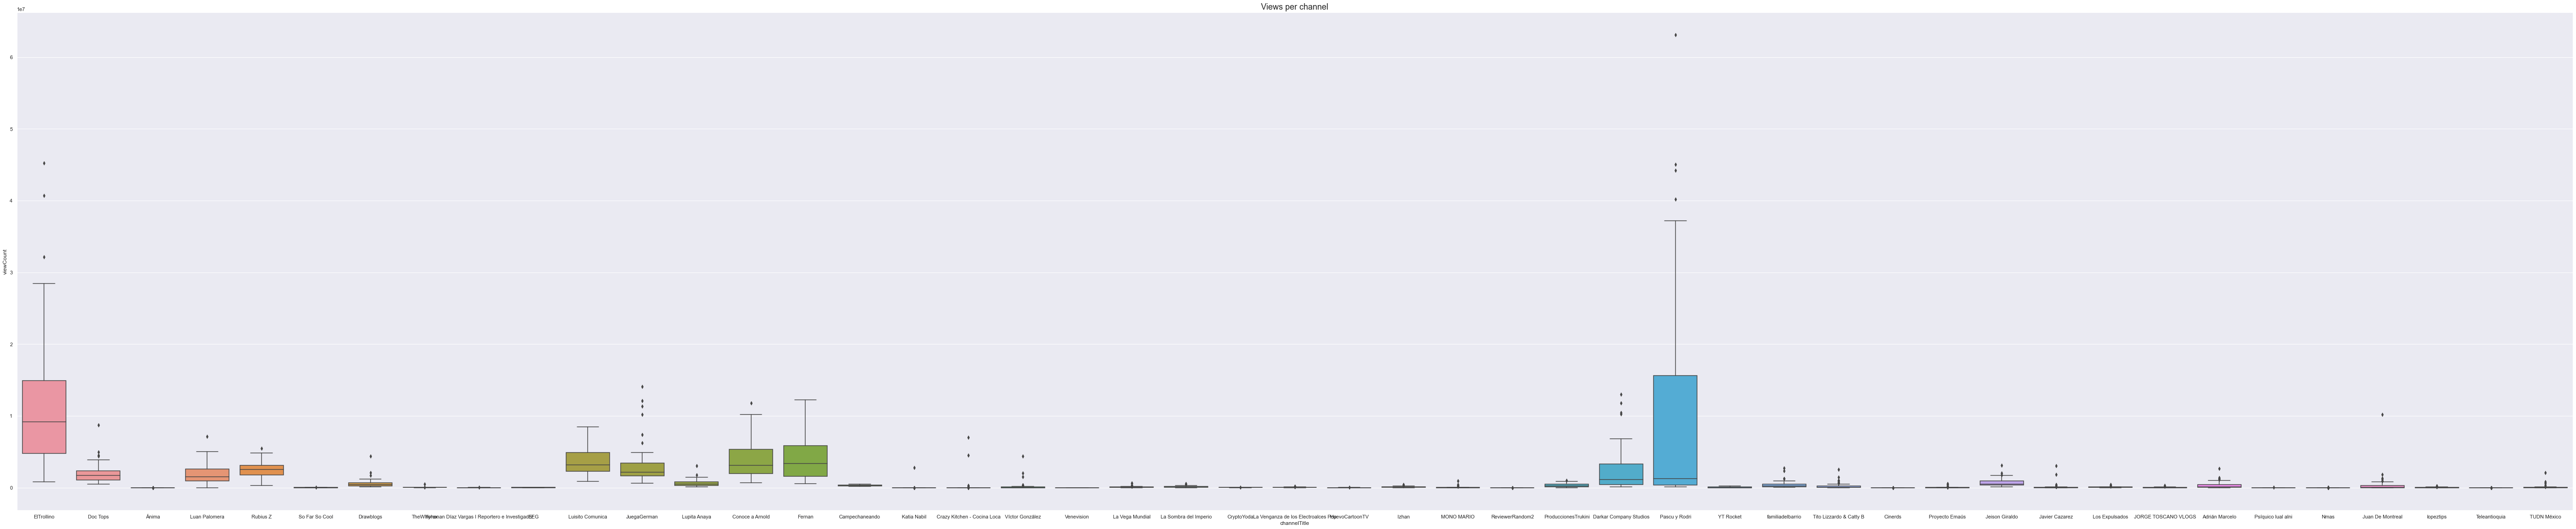

In [10]:
# distribucion de vistas por canal:

plt.rcParams['figure.figsize'] = (100, 20)
sns.boxplot(x=videos['channelTitle'], y=videos['viewCount'])
plt.title('Views per channel', fontsize = 18)
plt.show()
#plt.savefig('viral_content.pdf')

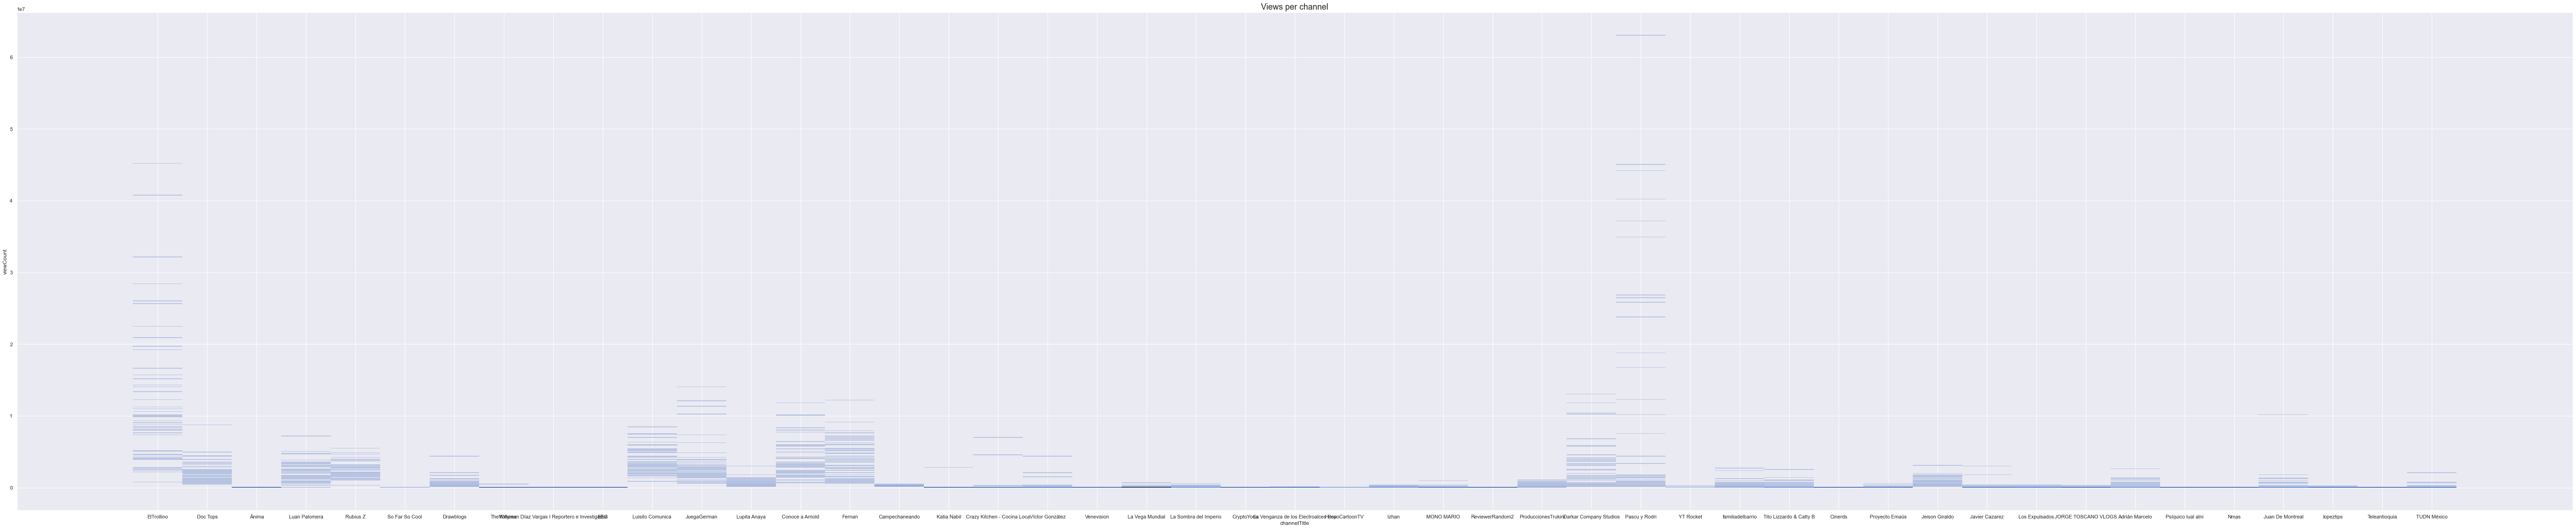

In [13]:
# distribucion de vistas por canal:
plt.rcParams['figure.figsize'] = (100, 20)
sns.histplot(x=videos['channelTitle'], y=videos['viewCount'])
plt.title('Views per channel', fontsize = 18)
plt.show()
#plt.savefig('viral_content.pdf')

### Correlación entre likes y comentarios por vista

Si bien la distribución de los puntos de data deja muy claro que existe una mayor tendencia al uso de likes que de comentarios, es muy evidente que hay una correlación directa entre el número de vistas y la cantidad de likes y comentarios. Es de esperarse que mientras mayor el número de visualizaciones tenga tu video mayor va a ser el resultado de retroalimentación en forma de likes o de comentarios.

Para resolver este problema desarrollamos una porción de metadata dedicada a encontrar la relación de likes y comentarios por video por cada 1000 reproducciones, de esta forma podremos ver de una forma concreta, los casos individuales de videos que rompan la tendencia y tengan mayores números de retroalimentación.

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

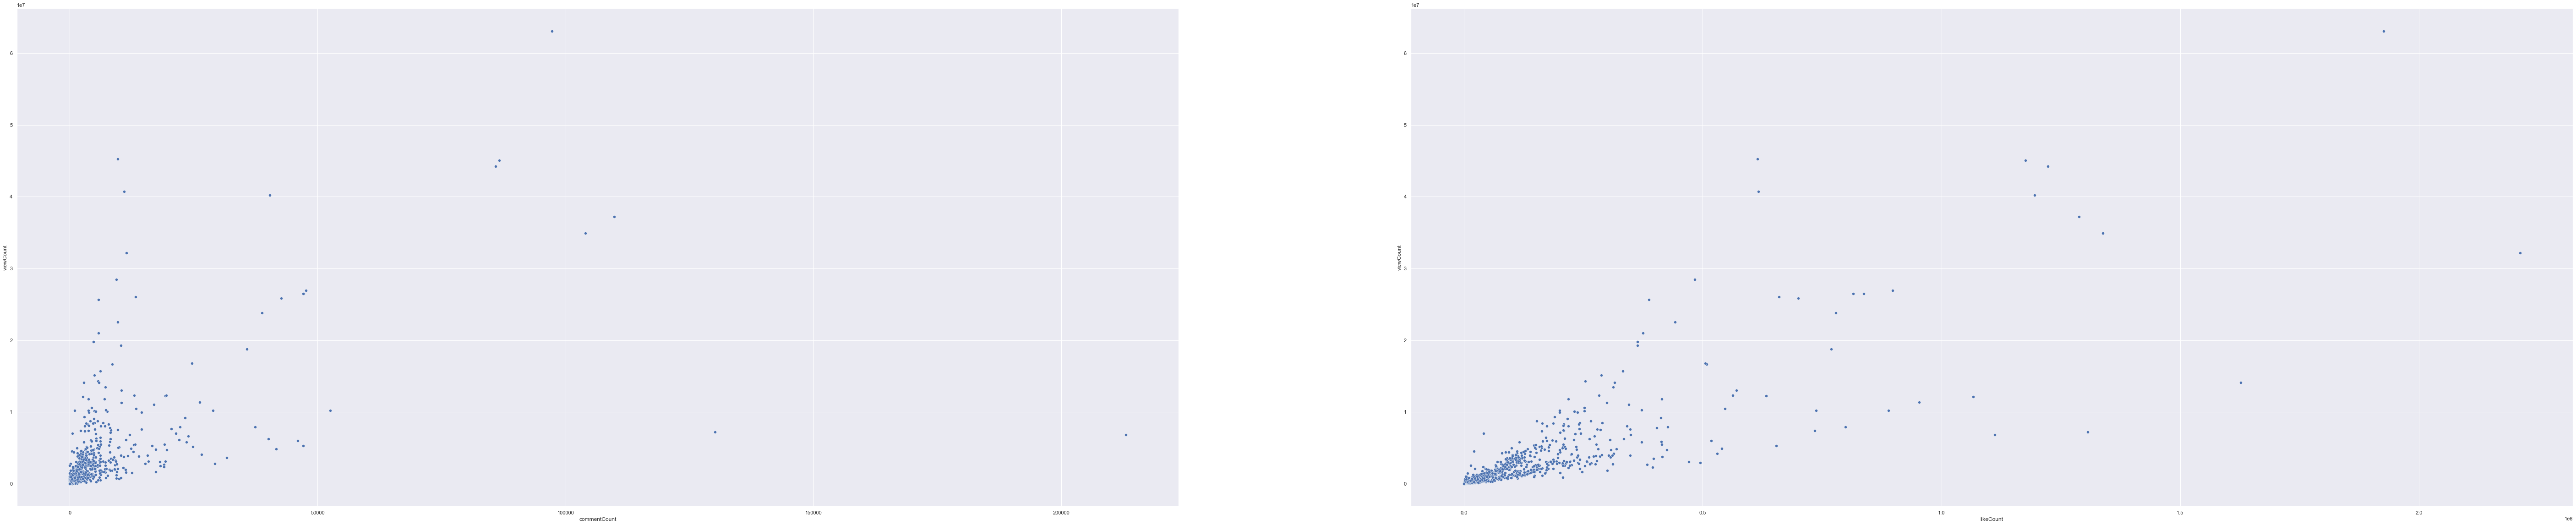

In [15]:
# likes y comentarios con relacion a vistas:

fig, ax =plt.subplots(1,2)
sns.scatterplot(data = videos, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = videos, x = "likeCount", y = "viewCount", ax=ax[1])
#plt.savefig('viewcount_corr_likes&comments.pdf')

### Correlación entre likes y comentarios por vista
Nuevamente podemos apreciar como existe una mayor tendencia al uso de likes que al número de comentarios, no obstante el uso de este tipo de gráfica es sumamente útil por que nos permite visualizar la densidad de la distribución.

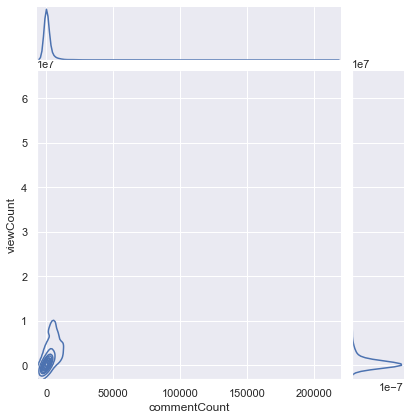

In [16]:
# corr comentarios y vistas
sns.jointplot(data= videos, x='commentCount', y = 'viewCount', kind='kde')
#plt.savefig('jointplot_viewcount_corr_commentCount.pdf')

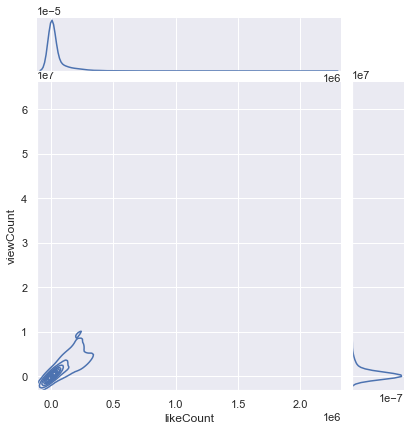

In [17]:
# corr likes y vistas
g = sns.jointplot(data= videos, x = 'likeCount', y='viewCount', kind='kde');
#plt.savefig('jointplot_viewcount_corr_likeCount.pdf')

### correlación entre likes y comentarios por 1000 vistas
La distribución de esta muestra afirma nuestra hipótesis sobre una correlación mayor entre likes y visualizaciones sobre la correlación de comentarios por reproducción, es decir que existe una mayor tendencia a que el número de visualizaciones está directamente influenciado por un incremento en la interacción de likes, no obstante el número de comentarios resulta irrelevante para incrementar el número de reproducciones.

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

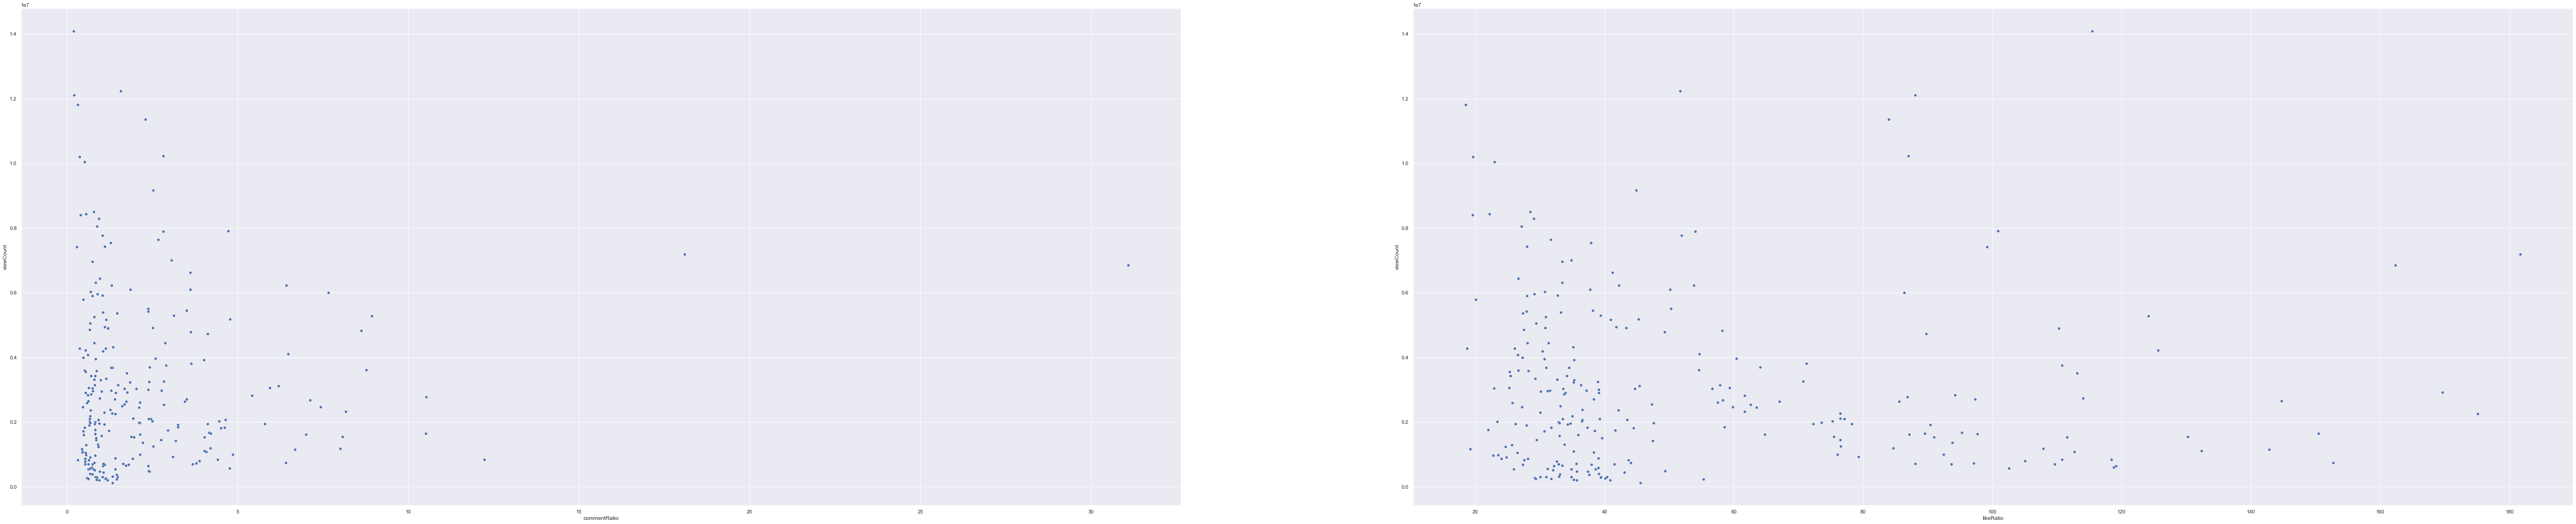

In [18]:
# likes y comentarios en relacion a views por cada 1000 views

fig, ax =plt.subplots(1,2)
sns.scatterplot(data = videos, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = videos, x = "likeRatio", y = "viewCount", ax=ax[1])
#plt.savefig('viewcount_comment_ratio&like_ratio.pdf')

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

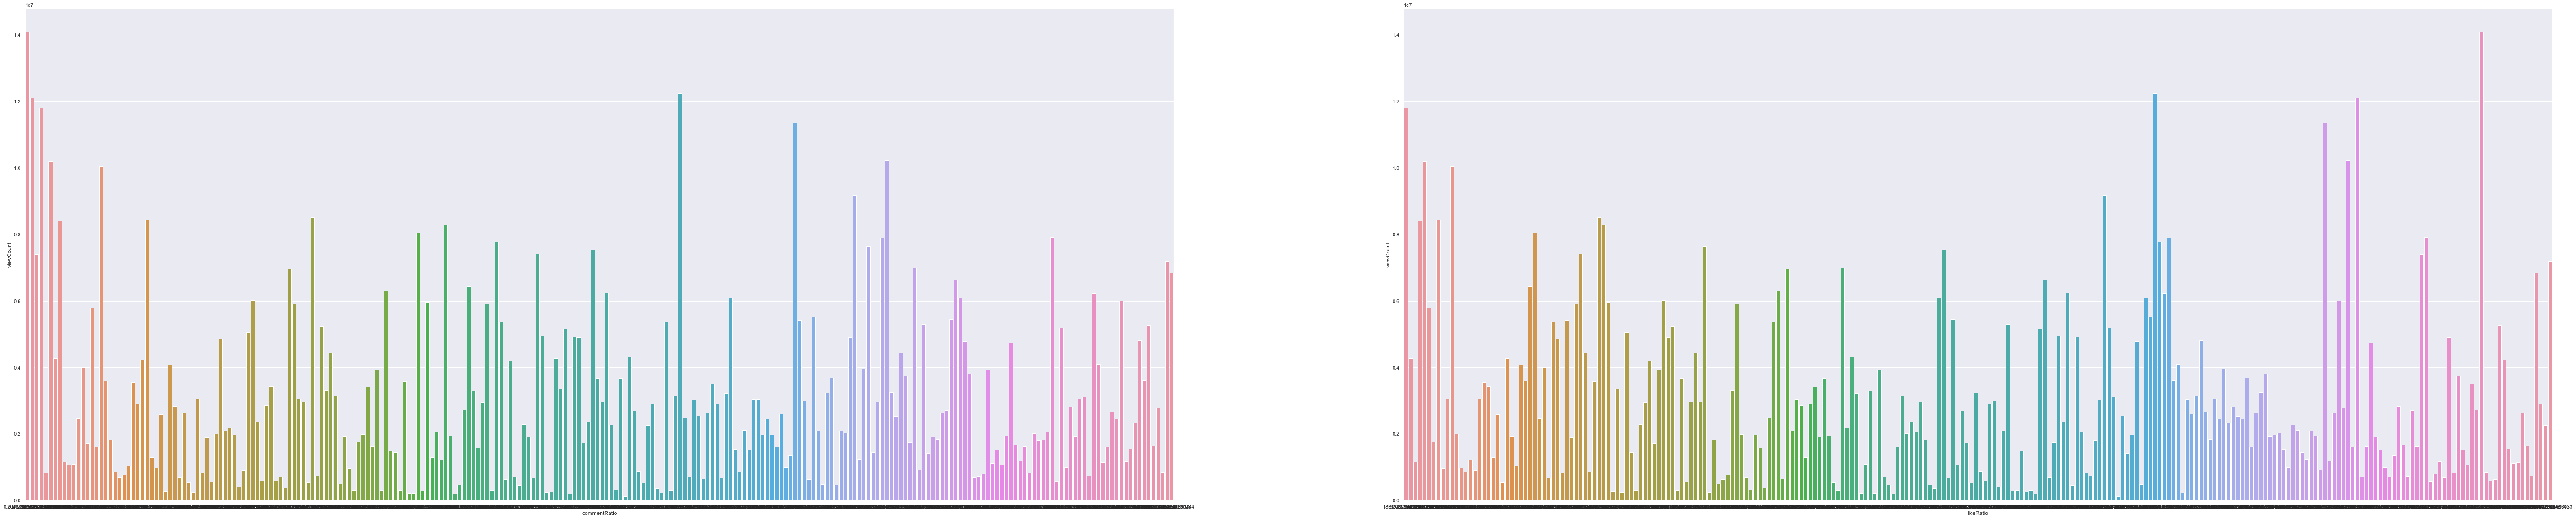

In [30]:
# likes y comentarios en relacion a views por cada 1000 views

fig, ax =plt.subplots(1,2)
sns.barplot(data = videos, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.barplot(data = videos, x = "likeRatio", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

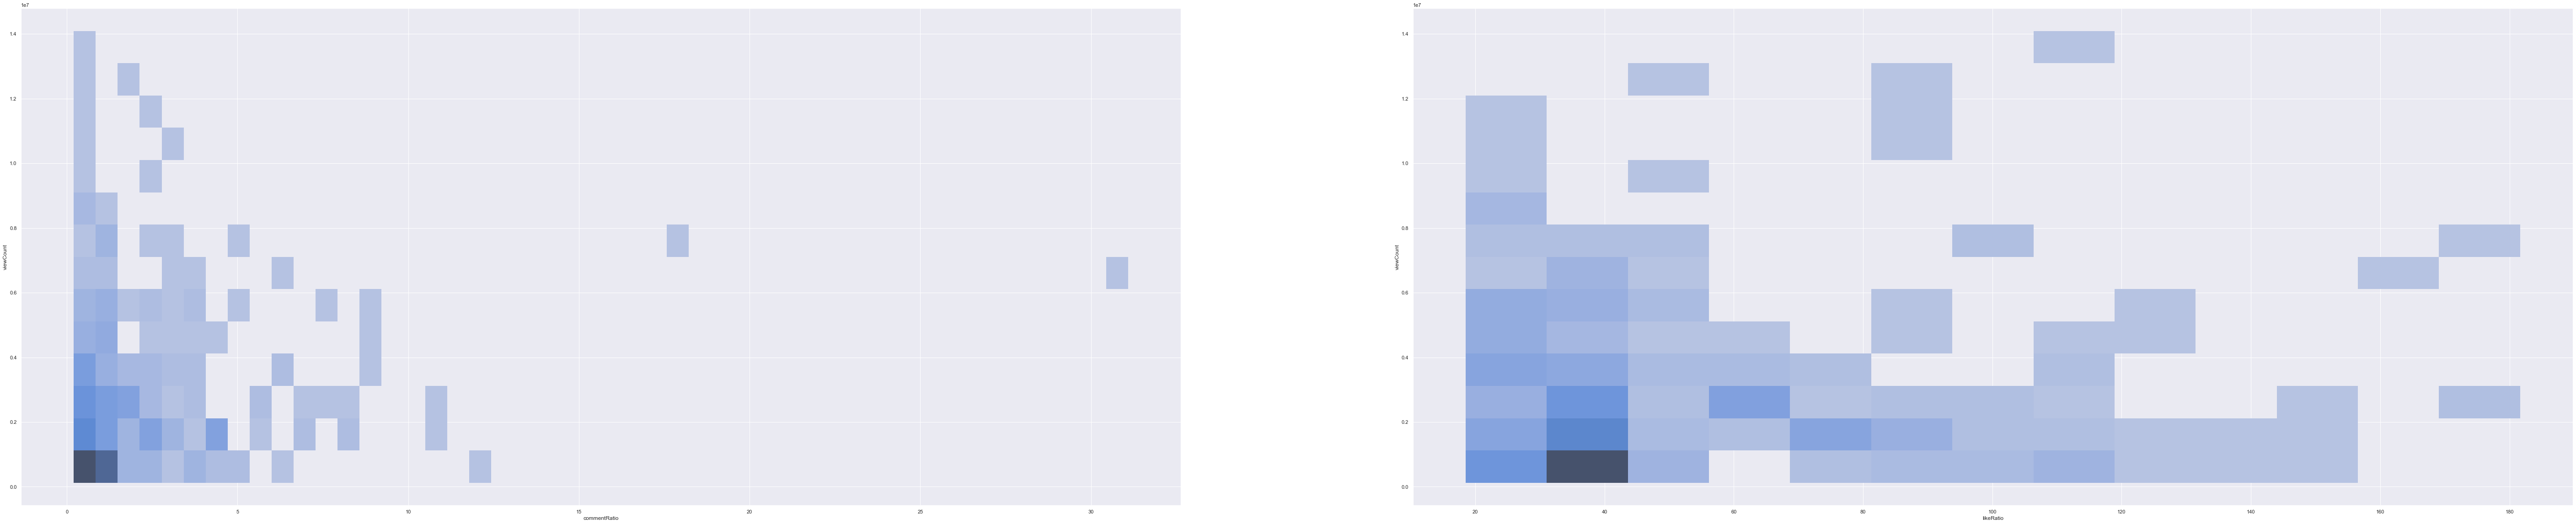

In [31]:
# likes y comentarios en relacion a views por cada 1000 views

fig, ax =plt.subplots(1,2)
sns.histplot(data = videos, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.histplot(data = videos, x = "likeRatio", y = "viewCount", ax=ax[1])

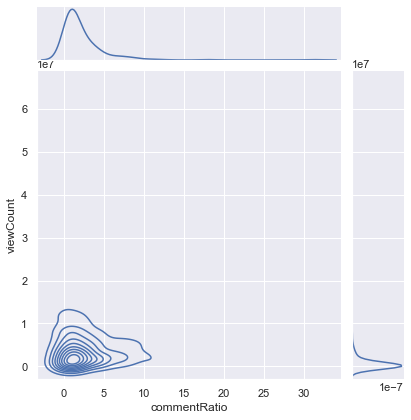

In [20]:
# corr comentarios por cada 1000 vistas
sns.jointplot(data= videos, x = 'commentRatio', y='viewCount', kind='kde')
#plt.savefig('jointplot_viewcount_corr_commentRatio.pdf')

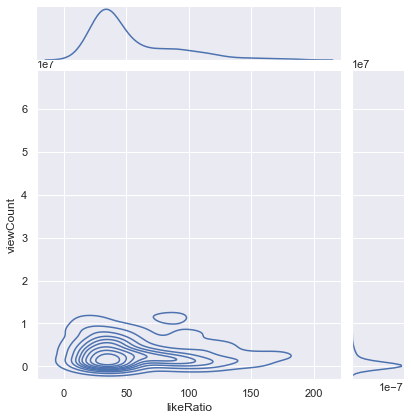

In [21]:
# corr likes por cada 1000 vistas
sns.jointplot(data= videos, x = 'likeRatio', y='viewCount', kind='kde')
plt.savefig('jointplot_viewcount_corr_likeRatio.pdf')

### correlación entre likes y comentarios por cada 1000 vistas
Las gráficas en la parte superior se muestra un incremento en un factor de 75 likes por comentario en cada 1000 reproducciones, nuevamente la utilidad del joint plot para ver la distribución de el like ratio sobre el comment Ratio, y es muy evidente la curva de disminución de retornos de los comments. Este es meramente un análisis descriptivo de las gráficas, pero es bastante lógico que exista esta disparidad tan grande entre la interacción a través de likes y a través de comentarios. En el diagnóstico final elaboramos todas las conclusiones del analisis estadístico para la aplicación de herramientas de alto impacto.

### histograma de duracion de los videos

La distribución del histograma muestra que más de la mitad de la muestra tiene una duración de no más de 20 minutos, sin embargo existe un gran número de videos con duraciones mayores a los 30 minutos.

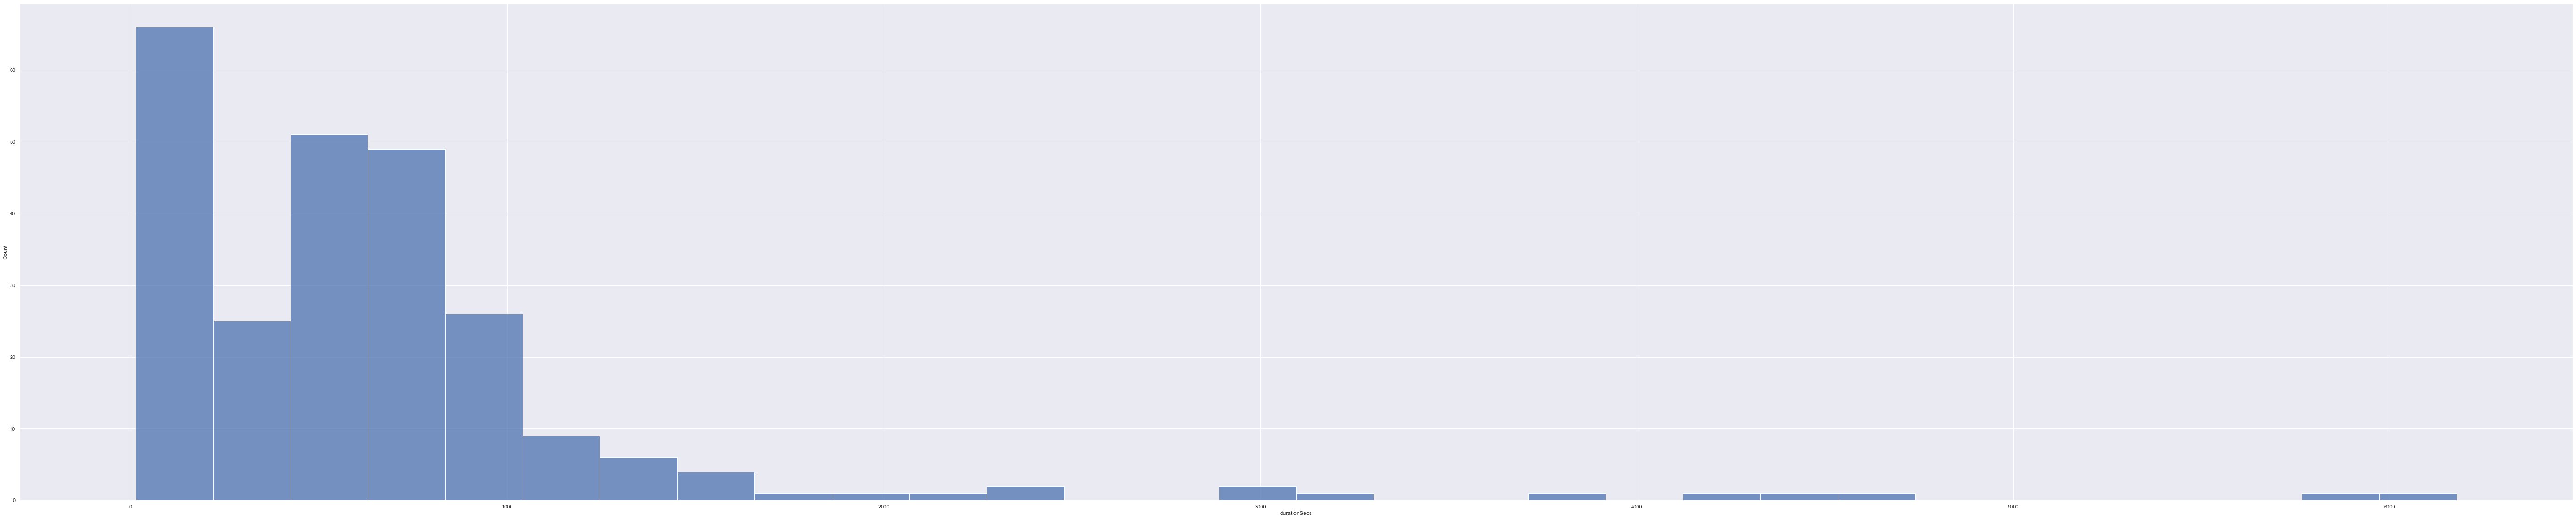

In [22]:
# views per duration:
sns.histplot(data=videos[videos['durationSecs'] < 10000], x="durationSecs", bins=30)
#plt.savefig('video_lenght_distribution.pdf')

<AxesSubplot:xlabel='durationSecs', ylabel='likeCount'>

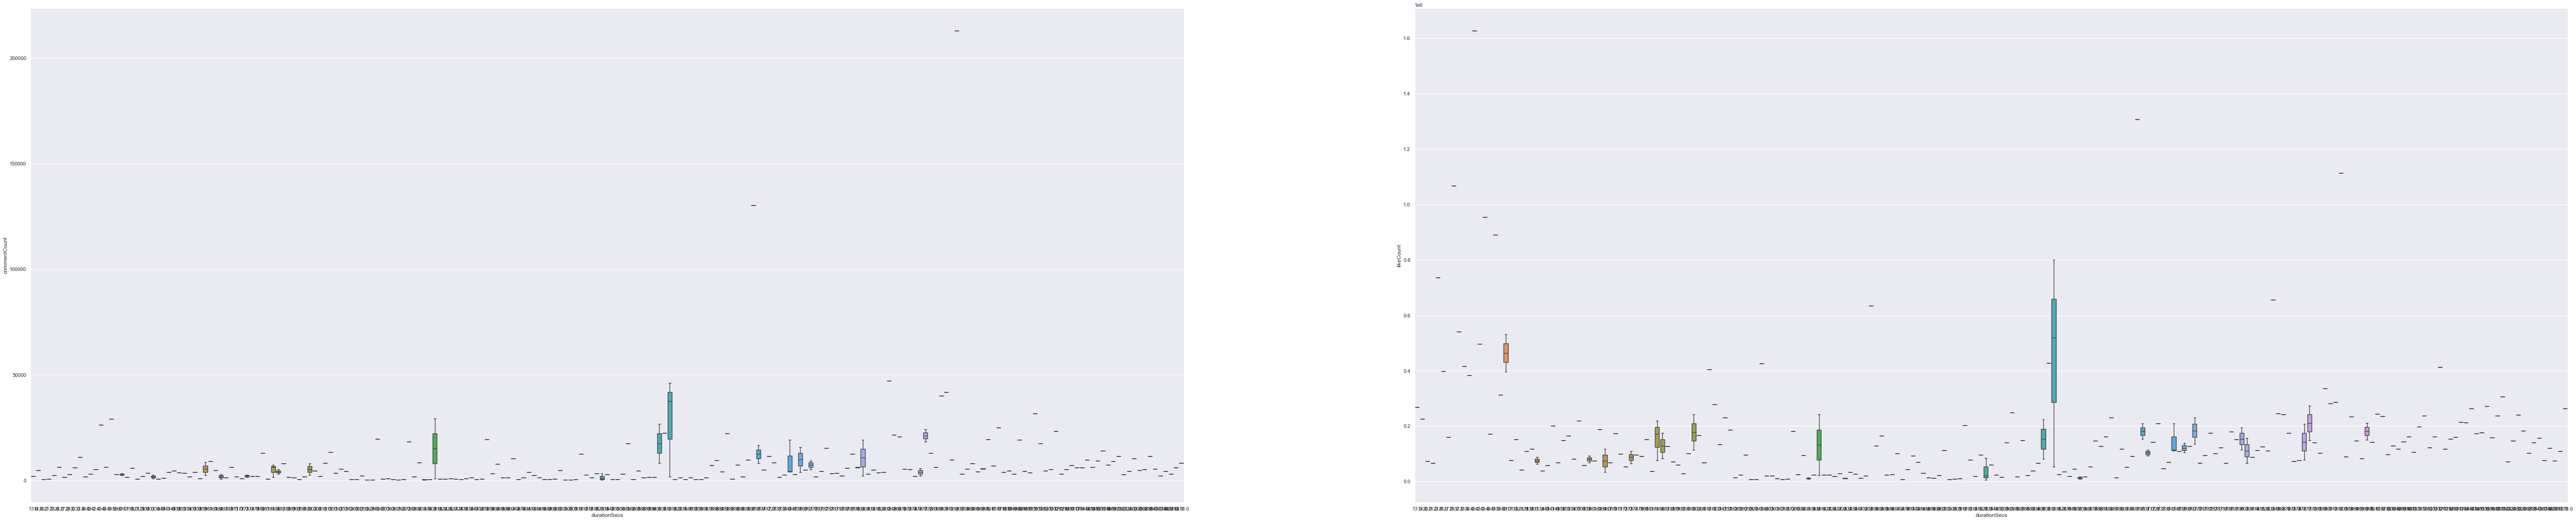

In [23]:
# duracion de video y correlacion de likes y comentarios:
fig, ax =plt.subplots(1,2)
sns.boxplot(data = videos, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.boxplot(data = videos, x = "durationSecs", y = "likeCount", ax=ax[1])
#plt.savefig('duration_corr_likes&comments.pdf')

### duración de video y correlación de likes y comentarios
El resultado de la gráfica superior describe dos situaciones que suceden, en primer lugar nuevamente el número de likes se correlaciona mejor con el sentimiento de la audiencia, la segunda instancia que vale la pena notar es que los videos que tienen una duración mayor, aunque son una menor muestra captan un número elevado de likes, esto puede deberse a que videos largos generalmente son más elaborados y el público aprecia el esfuerzo del creador del contenido, y puede también tener una correlación directa a que los canales que tienen una audiencia cautiva son los que tienen un mayor promedio de duración de sus videos.

<AxesSubplot:xlabel='titleLength', ylabel='viewCount'>

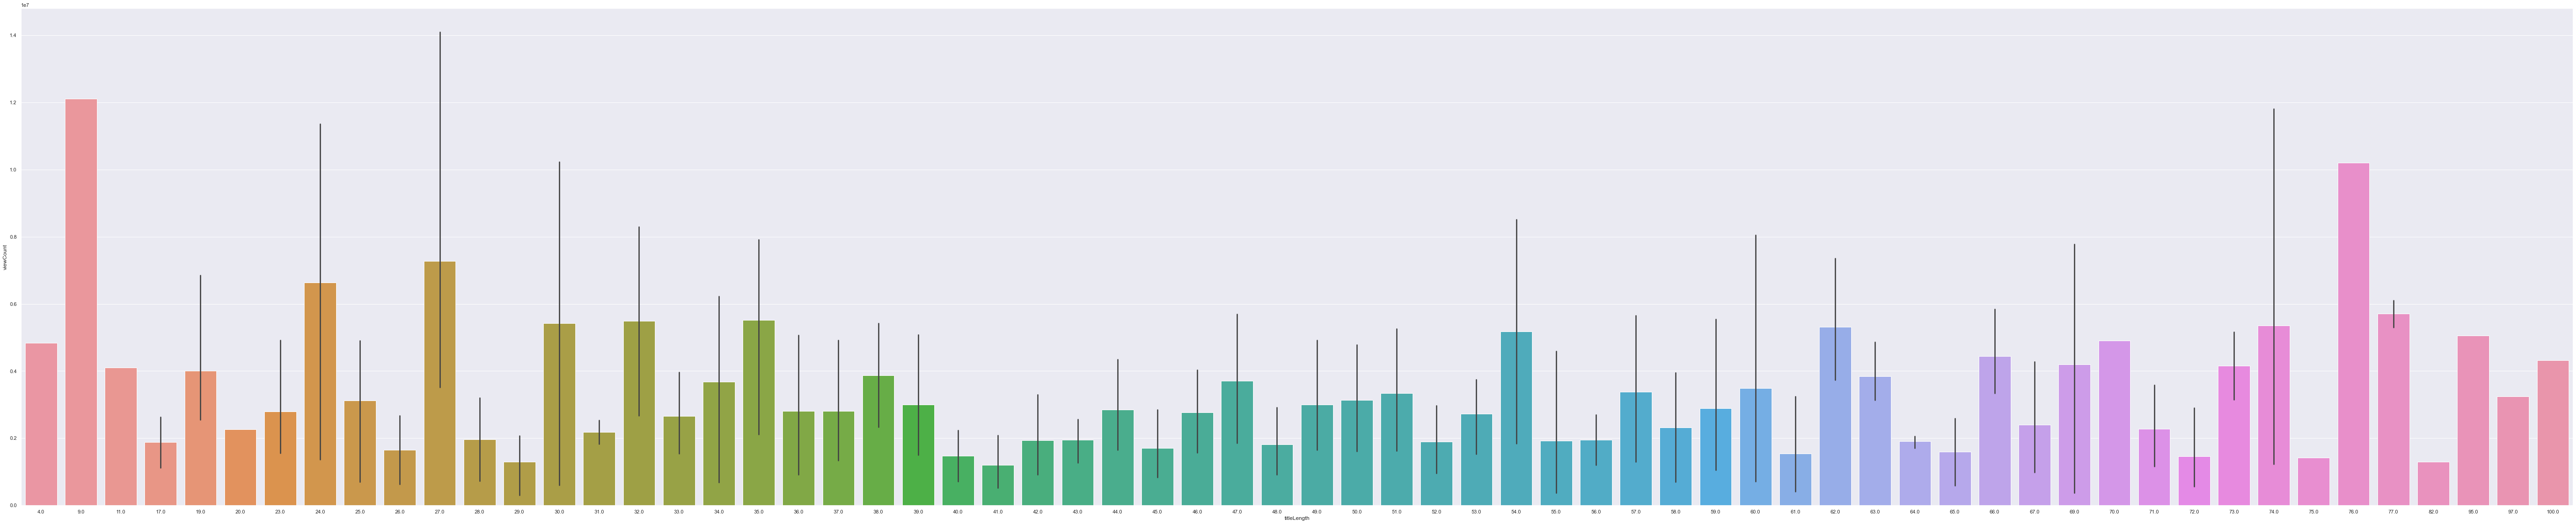

In [25]:
# corr de la longitud del encabezado del video y la cantidad de visualisaciones
sns.barplot(data = videos, x = "titleLength", y = "viewCount")
#plt.savefig('corr_titleLength_viewCount.pdf')

### Distribucion de impacto del video por longitud en caracteres del encabezado
Se determinó que la longitud óptima para el encabezado de los videos es entre 30 y 50 caracteres ya que es el rango en donde la muestra capta la mayor cantidad de reproducciones, vale la pena reconocer que existen outliers de interés en particular algunos vídeos con encabezados de 100 caracteres que captaron buena cantidad de reproducciones.

Sin embargo el tamaño de la muestra no es lo suficientemente robusta para determinar esta tendencia a los 100 caracteres por video.

La gráfica de la parte inferior refleja el mismo resultado pero dentro de una proyección diferente, se puede ver una distribución en el histograma superior de la cantidad de caracteres, en la parte inferior de la gráfica se puede ver una regresión que busca la mayor cantidad de visualizaciones por número de caracteres. En esta gráfica es más evidente como hay una mayor distribución de la muestra en los percentiles correspondientes a los rangos entre 30 - 50 caracteres

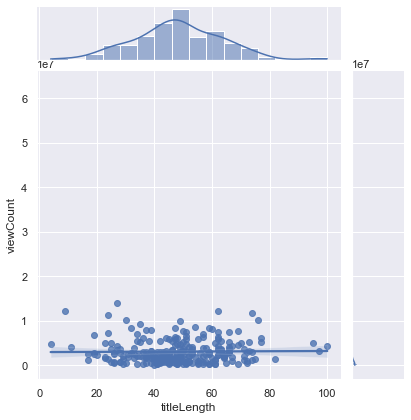

In [26]:
# corr No. de caracters y visualisaciones

sns.jointplot(data = videos, x = "titleLength", y = "viewCount", kind='reg')
#plt.savefig('jointplot_viewcount_corr_title_lenght.pdf')

### Reporte de Visualización de datos:

la gráfica en la parte inferior muestra una distribución muy poco común, ya que se puede observar que existe una división de 2 grupos en la población, existen videos con mas de 25 etiquetas y existen videos de un promedio de 10 etiquetas, sin embargo no existe una distribución central. El desarrollo de la gráfica demuestra una mayor cantidad de visualizaciones en canales que no utilizan más de 10 etiquetas para marcar su contenido. 

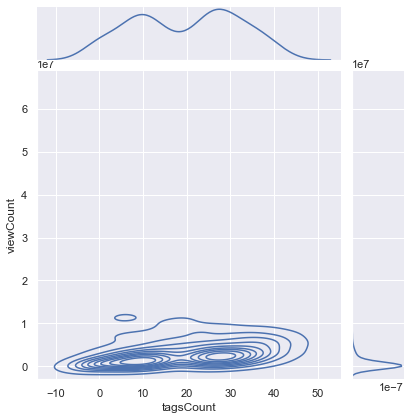

In [27]:
# correlacion entre el numero de etiquetas y la cantidad de visualisaciones:
sns.jointplot(data = videos, x = "tagsCount", y = "viewCount", kind='kde')
#plt.savefig('kde_viewcount_corr_tags.pdf')

### Distribución de publicaciones por día de la semana
La gráfica inferior se realizó con el propósito de descubrir los hábitos de liberación de contenido de los canales de la muestra, esta información puede ser útil para encontrar los días de la semana óptimos para liberar contenido de categorías específicas. Dentro de nuestra base de datos existe una gran variedad de contenido desarrollado por diferentes canales, y existen correlaciones entre el tipo de contenido y el dia de la semana que es recomendable liberar, al generar esta metadata nosotros podemos asesorar de una mejor manera al creador de contenido sobre cuándo debería exponer su contenido nuevo al público.

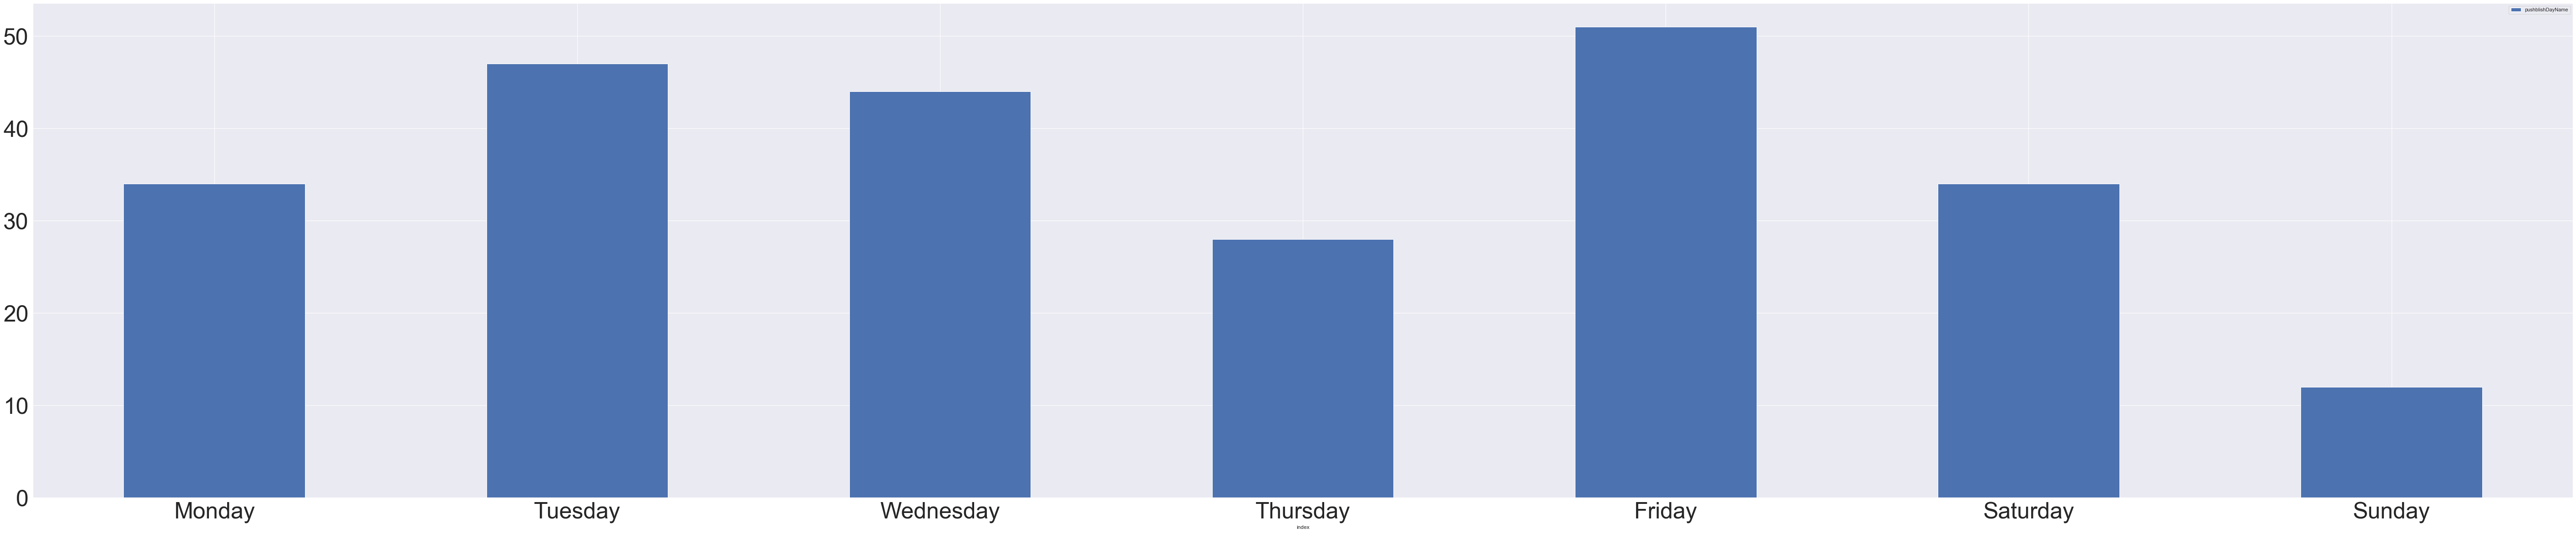

In [28]:
# uploads por dia de la semana
day_df = pd.DataFrame(videos['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0, fontsize=50)
#plt.savefig('weekly_post_average.pdf')